<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Physician-density-vs-health-spend-per-capita" data-toc-modified-id="Physician-density-vs-health-spend-per-capita-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Physician density vs health spend per capita</a></span></li><li><span><a href="#Physician-density-and-GDP-per-capita" data-toc-modified-id="Physician-density-and-GDP-per-capita-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Physician density and GDP per capita</a></span></li><li><span><a href="#NPA-density-vs-health-spend-per-capita" data-toc-modified-id="NPA-density-vs-health-spend-per-capita-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NPA density vs health spend per capita</a></span></li><li><span><a href="#NPA-density-vs-MMR" data-toc-modified-id="NPA-density-vs-MMR-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>NPA density vs MMR</a></span></li><li><span><a href="#Physician-density-vs-MMR" data-toc-modified-id="Physician-density-vs-MMR-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Physician density vs MMR</a></span></li><li><span><a href="#Physician-density-and-HIV-prevalence" data-toc-modified-id="Physician-density-and-HIV-prevalence-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Physician density and HIV prevalence</a></span></li><li><span><a href="#MMR-vs-health-spend-per-capita" data-toc-modified-id="MMR-vs-health-spend-per-capita-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>MMR vs health spend per capita</a></span></li><li><span><a href="#MMR-vs-GDP-per-capita" data-toc-modified-id="MMR-vs-GDP-per-capita-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>MMR vs GDP per capita</a></span></li><li><span><a href="#ALL-physician-density-vs-MMR" data-toc-modified-id="ALL-physician-density-vs-MMR-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>ALL physician density vs MMR</a></span></li><li><span><a href="#ratio-of-PAs-and-NPAs-to-MMR" data-toc-modified-id="ratio-of-PAs-and-NPAs-to-MMR-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ratio of PAs and NPAs to MMR</a></span></li><li><span><a href="#MMR-and-TB-incidence" data-toc-modified-id="MMR-and-TB-incidence-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>MMR and TB incidence</a></span></li><li><span><a href="#comparison-of-our-NPA-and-PA-numbers-to-WFSA-map" data-toc-modified-id="comparison-of-our-NPA-and-PA-numbers-to-WFSA-map-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>comparison of our NPA and PA numbers to WFSA map</a></span></li></ul></div>

In [63]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True) # run at the start of every notebook
df1 = pd.read_csv('density.csv')

df1 = df1.dropna()
df=df1
df["pdensity"] = pd.to_numeric(df.pdensity, errors='coerce')
df["ndensity"] = pd.to_numeric(df.ndensity, errors='coerce')
df["hspendcap"] = pd.to_numeric(df.hspendcap, errors='coerce')
df["hivprev"] = pd.to_numeric(df.hivprev, errors='coerce')
df['salt'] = pd.to_numeric(df.salt, errors='coerce')
df['tbincidence'] = pd.to_numeric(df.tbincidence, errors='coerce')



#create df1 where paps and npaps = 0 are removed
#df = df1[df1['paps']>0]
#df = df[df['npaps']>0]

df['paps'] = df['paps'].replace(0,np.nan)
df['npaps'] = df['npaps'].replace(0,np.nan)
df['redcappas'] = df['redcappas'].replace(0,np.nan)
df['redcapnpas'] = df['redcapnpas'].replace(0,np.nan)

In [41]:
df.head()

,country,2015,hdi,mmr,population,paps,pdensity,npaps,ndensity,gdpcap,hspendcap,phys1000,incomeclass,hivprev,redcappas,redcapnpas
0,Afghanistan,60.088813,0.493,396.0,35530081,6.0,0.016887,NaN,0.000000,569.577923,60.088813,0.295,Low income,NaN,NaN,NaN
1,Albania,265.903236,0.776,29.0,2873457,260.0,9.048334,90.0,3.124237,3952.830781,265.903236,1.286,Upper middle income,0.1,NaN,NaN
2,Algeria,291.635898,0.749,140.0,41318142,1550.0,3.751379,3500.0,8.778194,4160.220067,291.635898,1.207,Upper middle income,0.1,2000.0,NaN
4,Andorra,4315.698309,0.854,0.0,76965,10.0,12.992919,NaN,0.000000,36038.267600,4315.698309,3.69,High income,NaN,NaN,NaN
5,Angola,108.559535,0.854,0.0,29784193,60.0,0.201449,NaN,0.000000,3683.552607,108.559535,0.144,Lower middle income,1.9,60.0,NaN


# Physician density vs health spend per capita

In [42]:
# Create a trace
trace = go.Scatter(
    x = df['hspendcap'],
    y = df['pdensity'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='Health spend per capita and physician anesthesia density',
    xaxis=dict(
    title='Health spend per capita $'
    ),
    
    yaxis=dict(
    title='Physician anesthetists per 100,000')
)

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig, filename='hspend_physdensity')

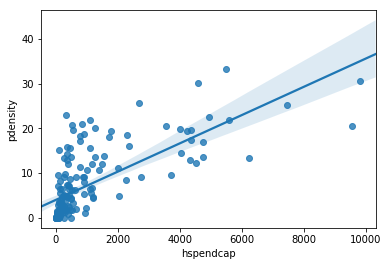

In [43]:
sb.regplot(x='hspendcap', y='pdensity', data=df)

# Physician density and GDP per capita

In [44]:
# Create a trace
trace = go.Scatter(
    x = df['gdpcap'],
    y = df['pdensity'],
    mode = 'markers',
     
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='GDP per capita and physician anesthesiologist density',
    xaxis=dict(
    title='GDP Per capita'
    ),
    
    yaxis=dict(
    title='Physician anesthesiologist per 100,000')
)

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig, filename='GDP_Pdensity')

# Plot and embed in ipython notebook!
py.offline.iplot(data)

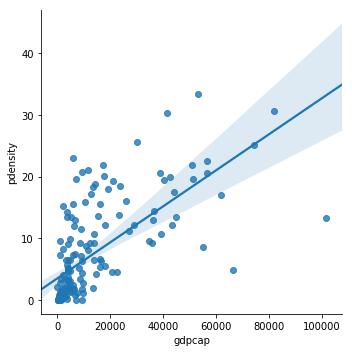

In [45]:
sb.lmplot(x='gdpcap', y='pdensity', data=df)

# NPA density vs health spend per capita

In [46]:
t1 = df[df.ndensity<25]
t1 = t1[t1.ndensity>0]

# Create a trace
trace = go.Scatter(
    x = t1['hspendcap'],
    y = t1['ndensity'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

# Plot and embed in ipython notebook!
py.offline.iplot(data)

# NPA density vs MMR

In [47]:
t1 = df[df.ndensity<25]
t1 = t1[t1.ndensity>0]

# Create a trace
trace = go.Scatter(
    x = df['ndensity'],
    y = df['mmr'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='Nonphysician density and maternal mortality rate',
    xaxis=dict(
    title='Nonphysicians per 100,000'
    ),
    
    yaxis=dict(
    title='maternal mortality rate')
)

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig, filename='NPA_mmr')

In [48]:
t1 = df[df.ndensity<25]
t1 = t1[t1.ndensity>0]

# Create a trace
trace = go.Scatter(
    x = t1['ndensity'],
    y = t1['mmr'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='Nonphysician density and maternal mortality rate',
    xaxis=dict(
    title='Nonphysicians per 100,000'
    ),
    
    yaxis=dict(
    title='maternal mortality rate')
)

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig, filename='NPA_mmr')

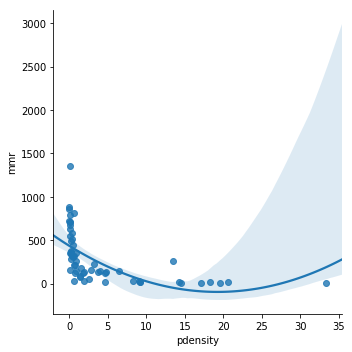

In [49]:
sb.lmplot(x='pdensity', y='mmr', data=t1, order=2)

# Physician density vs MMR

In [50]:
# Create a trace
trace = go.Scatter(
    x = df['pdensity'],
    y = df['mmr'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

# Plot and embed in ipython notebook!
py.offline.iplot(data)

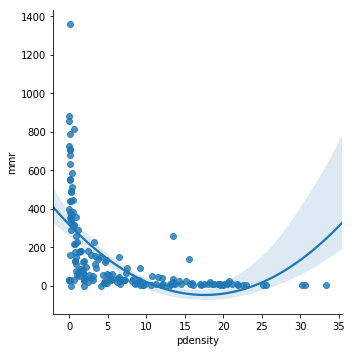

In [51]:
sb.lmplot(x='pdensity', y='mmr', data=df, order=2)

# Physician density and HIV prevalence

In [52]:
# Create a trace
trace = go.Scatter(
    x = df['pdensity'],
    y = df['hivprev'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='Anesthesiologist density and HIV prevalence',
    xaxis=dict(
    title='Anesthesia physicians per 100,000 population'
    ),
    
    yaxis=dict(
    title='HIV prevalence')
)

# Plot and embed in ipython notebook!
fig=go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

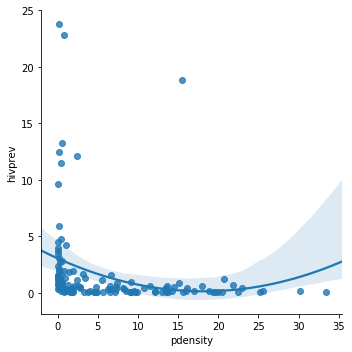

In [53]:
sb.lmplot(x='pdensity', y='hivprev', order=2, data=df)

# MMR vs health spend per capita

In [54]:
t1 = df[df['hspendcap']<4000]

# Create a trace
trace = go.Scatter(
    x = t1['hspendcap'],
    y = t1['mmr'],
    mode = 'markers',
    text = t1['country']
)

data = [trace]

layout = go.Layout(
    title='MMR vs health spend per capita',
    xaxis=dict(
    title='health spend per capita'
    ),
    
    yaxis=dict(
    title='maternal mortality rate')
)

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

# MMR vs GDP per capita

In [55]:
t1 = df[df['hspendcap']<4000]

# Create a trace
trace = go.Scatter(
    x = t1['gdpcap'],
    y = t1['mmr'],
    mode = 'markers',
    text = t1['country']
)

data = [trace]

layout = go.Layout(
    title='MMR vs GDP per capita',
    xaxis=dict(
    title='gdp per capita'
    ),
    
    yaxis=dict(
    title='maternal mortality rate')
)

# Plot and embed in ipython notebook!
fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

# ALL physician density vs MMR

In [56]:
# Create a trace
trace = go.Scatter(
    x = df['phys1000'],
    y = df['mmr'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='Total physician density and MMR',
    xaxis=dict(
    title='Total physicians per 1000'
    ),
    
    yaxis=dict(
    title='maternal mortality rate')
)

# Plot and embed in ipython notebook!
fig=go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# ratio of PAs and NPAs to MMR

In [57]:
df['pnratio'] = df.ndensity/df.pdensity

In [58]:
# Create a trace
trace = go.Scatter(
    x = df['pnratio'],
    y = df['mmr'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='NPA:PA ratio and MMR',
    xaxis=dict(
    title='NPA:PA ratio'
    ),
    
    yaxis=dict(
    title='maternal mortality rate')
)

# Plot and embed in ipython notebook!
fig=go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# MMR and TB incidence

In [68]:
# Create a trace
trace = go.Scatter(
    x = df['pdensity'],
    y = df['tbincidence'],
    mode = 'markers',
    text = df['country']
)

data = [trace]

layout = go.Layout(
    title='Physician density and TB incidence',
    xaxis=dict(
    title='Physician anesthesiologist per 100,000'
    ),
    
    yaxis=dict(
    title='TB incidence')
)

# Plot and embed in ipython notebook!
fig=go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

# comparison of our NPA and PA numbers to WFSA map

In [81]:
t1 = df[df['redcappas'].notnull()]
# Create a trace
trace1 = {"y": t1['paps'], 
          "x": t1['country'], 
          "marker": {"color": "blue", "size": 5}, 
          "mode": "markers", 
          "type": "scatter",
         "name": 'WFSA'
}

trace2 = {"y": t1['redcappas'], 
          "x": t1['country'], 
          "marker": {"color": "pink", "size": 5}, 
          "mode": "markers", 
          "type": "scatter",
         "name": "UCSF"
}

data = [trace1, trace2]

layout = go.Layout(
    autosize=True,
    title='UCSF vs WFSA PAP numbers'
    #width=500,
    #height=1000,
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)

In [80]:
t1 = df[df['redcapnpas'].notnull()]
# Create a trace
trace1 = {"y": t1['npaps'], 
          "x": t1['country'], 
          "marker": {"color": "blue", "size": 5}, 
          "mode": "markers", 
          "type": "scatter",
         "name": 'WFSA'
}

trace2 = {"y": t1['redcapnpas'], 
          "x": t1['country'], 
          "marker": {"color": "pink", "size": 5}, 
          "mode": "markers", 
          "type": "scatter",
         "name": "UCSF"
}

data = [trace1, trace2]

layout = go.Layout(
    autosize=True,
    title="UCSF v WFSA"
    #width=500,
    #height=1000,
)

fig = go.Figure(data=data, layout=layout)

py.offline.iplot(fig)